In [97]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from tqdm import tqdm  # Optional: for progress tracking
from src.utils.Contact_Matrix import create_contact_matrix, matrix_scaling
from src.utils.visualization.used import *

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv("data_homophily.csv")
df = df.dropna()

mask_distribution = extract_behavior_distribution(df, "masks")
test_distribution = extract_behavior_distribution(df, "testing")
vaccine_distribution = extract_behavior_distribution(df, "vacc")

mask_matrix = generate_contact_matrix(df, "masks")
test_matrix = generate_contact_matrix(df, "testing")
vaccine_matrix = generate_contact_matrix(df, "vacc")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


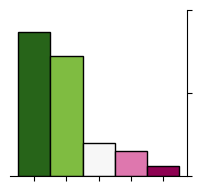

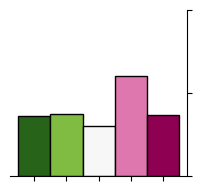

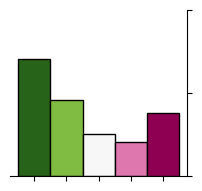

In [3]:
fig, ax = plot_histogram_distribution(mask_distribution, save_path="figures/Fig_2/masks_distribution.pdf")
fig, ax = plot_histogram_distribution(test_distribution, save_path="figures/Fig_2/testing_distribution.pdf")
fig, ax = plot_histogram_distribution(vaccine_distribution, save_path="figures/Fig_2/vaccine_distribution.pdf")

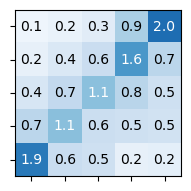

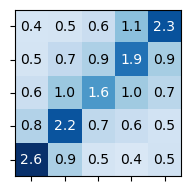

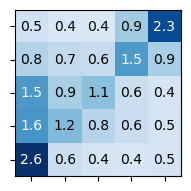

In [4]:
fig, ax = plot_contact_matrix(mask_matrix, Lx, Ly, path="figures/Fig_2/mask_contact_matrix.pdf")
fig, ax = plot_contact_matrix(test_matrix, Lx, Ly, path="figures/Fig_2/testing_contact_matrix.pdf")
fig, ax = plot_contact_matrix(vaccine_matrix, Lx, Ly, path="figures/Fig_2/vaccine_contact_matrix.pdf")

In [5]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from src.models import SIRM, SIRT, SIRV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
NB = 100
NP = 100

homophilic_tendency = {"m": 0, "M": 6, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}

P = [0.1, 0.5, 0.9]

In [7]:
# visualization parameters

colors_X = ['#66c2a4', '#238b45','#00441b']  # fixed polarization
colors_Y = ['#67001f', '#e7298a', '#df65b0'] # fixed homophily
my_map = discretize_cmaps("hot_r",21)
my_map.set_bad(color='gray')
cmaps = [my_map]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [0, 3, 6],
        'xlim': [0, 1],
        'ylim': [0, 6]
    }

Lx_slim = 11
figsize_slim = [from_mm_to_in(18), from_mm_to_in(42)]
print(figsize_slim)

In [162]:
temp = read_json("./parameters.json")
mus, taus, xis, PARAMS = temp["mus"], temp["taus"], temp["xis"], temp["PARAMS"]
rect_coords_M = [mus["pol"][0], mus["h"][0], mus["pol"][2]-mus["pol"][0], mus["h"][2]-mus["h"][0]]
rect_coords_T = [taus["pol"][0], taus["h"][0], taus["pol"][2]-taus["pol"][0], taus["h"][2]-taus["h"][0]]
rect_coords_V = [xis["pol"][0], xis["h"][0], xis["pol"][2]-xis["pol"][0], xis["h"][2]-xis["h"][0]]

In [163]:
NB_final = 100

pol_range = {"m": 0, "M": 1, "n": NB_final}
homophilic_tendency = {"m": 0, "M": 6, "n": NB_final}

In [170]:
PARAMS["fixed_mean"] = mus["mean"][1]
temp_beta_M = PARAMS["beta_M"]
temp_rec = PARAMS["recovery_rate"]
PARAMS["beta_M"] = 0.4
PARAMS["recovery_rate"] = 0.1
PARAMS["dT"] = 0.5
RM_2 = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
PARAMS["beta_M"] = temp_beta_M
PARAMS["recovery_rate"] = temp_rec

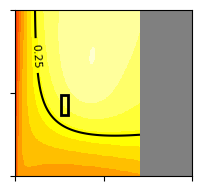

In [171]:
path_2_M = "figures/Fig_2/I(pol,hom,mean)_M.pdf"
matrix_data_M1, plot_params_M1 = analyze_matrix(RM_2, "infections")
#plot_params_M1["vmin"] = 0
#plot_params_M1["vmax"] = 0.2
fig_R_M_2 = plot_matrix(
    data=matrix_data_M1,
    **plot_params_M1,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize=(final_params.get('Lx', 10), final_params.get('Ly', 8)),
    contour_values = [0.25, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    rect_coords = rect_coords_M,
    save_path = path_2_M

)


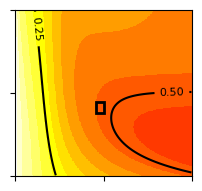

In [172]:
path_2_T = "figures/Fig_2/I(pol,hom,mean)_T.pdf"
PARAMS["fixed_mean"] = taus["mean"][1]
RT_2 = sweep_two_parameters(
    model_module=SIRT,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
matrix_data_T2, plot_params_T2 = analyze_matrix(RT_2, "infections")

fig_R_T_2 = plot_matrix(
    data=matrix_data_T2,
    **plot_params_T2,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize=(final_params.get('Lx', 10), final_params.get('Ly', 8)),
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_2_T,
    rect_coords = rect_coords_T,
)


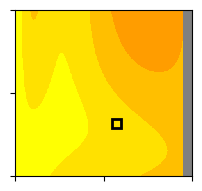

In [173]:
path_2_V = "figures/Fig_2/I(pol,hom,mean)_V.pdf"
PARAMS["fixed_mean"] = xis["mean"][1]
RV_2 = sweep_two_parameters(
    model_module=SIRV,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=PARAMS,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
matrix_data_V2, plot_params_V2 = analyze_matrix(RV_2, "infections")

fig_R_V_2 = plot_matrix(
    data=matrix_data_V2,
    **plot_params_V2,  # Unpack all the extracted parameters
    cmap=cmaps[0],  # Using the first colormap
    figsize=(final_params.get('Lx', 10), final_params.get('Ly', 8)),
    contour_values = [0.25, 0.5, 0.75],
    xticks = [0,0.5,1],
    yticks = [0,3,6],
    save_path = path_2_V,
    rect_coords = rect_coords_V,
)


In [140]:
mus

{'mean': [0.76, 0.77, 0.78], 'pol': [0.26, 0.28, 0.3], 'h': [2.22, 2.57, 2.93]}

In [174]:
PARAMS["beta_M"] = 0.4
PARAMS["recovery_rate"] = 0.1
P_min_M, P_max_M = find_hpol_minmax(SIRM, mus, PARAMS)
PARAMS["beta_M"] = 0.2
PARAMS["recovery_rate"] = 0.1
P_min_T, P_max_T = find_hpol_minmax(SIRT, taus, PARAMS)
P_min_V, P_max_V = find_hpol_minmax(SIRV, xis, PARAMS)

Minimum R+I value: 0.1543
   at polarization = 0.2995, homophily = 2.9211
Maximum R+I value: 0.2193
   at polarization = 0.2605, homophily = 2.2289
Minimum R+I value: 0.4778
   at polarization = 0.4605, homophily = 2.6749
Maximum R+I value: 0.4894
   at polarization = 0.4995, homophily = 2.2751
Minimum R+I value: 0.3041
   at polarization = 0.5506, homophily = 1.7244
Maximum R+I value: 0.3168
   at polarization = 0.5994, homophily = 2.0656


In [175]:
N_days = 801
days = np.arange(0, N_days+1, 1)

Percentage increase in infections for M model: -74.35%
base = 0.6458476 predicted = 0.1656588


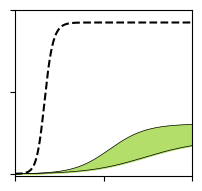

In [183]:
temp_beta_M = PARAMS["beta_M"]
temp_rec = PARAMS["recovery_rate"]
temp_rec = 0.1
temp_beta_M = 0.2

PARAMS["beta_M"] = 0.4
PARAMS["recovery_rate"] = 0.1
PARAMS["dT"] = 1

MINS_M, MAXS_M, BASES_M, OG_M = calc_minmax_trajectories(SIRM, P_min_M, P_max_M, mus["mean"][1], PARAMS, simulated_days = N_days)
fig_comparison_M = plot_double_comparison(days, MINS_M, MAXS_M, BASES_M, OG_M, "figures/Fig_2/I(pol,hom)_M.pdf", Lx, Ly, x_max = 800, y_max = 0.7)

avg_predicted = (MINS_M[0][-1] + MINS_M[1][-1] + MAXS_M[0][-1] + MAXS_M[1][-1]) / 2

avg_base = (BASES_M[0][-1] + BASES_M[1][-1]) / 1

perc_increase = ((avg_predicted - avg_base) / avg_base) * 100
print(f"Percentage increase in infections for M model: {perc_increase:.2f}%")
print("base =", avg_base,"predicted =", avg_predicted)

PARAMS["beta_M"] = temp_beta_M
PARAMS["recovery_rate"] = temp_rec



In [186]:
70*1.2

84.0

In [187]:
0.5*(1/0.1 + 1/(0.1+0.21))

6.612903225806452

In [188]:
(1/(0.1+0.21/2))

4.878048780487805

In [177]:
temp_rec

0.1

increase in infections for T model: x 127.64
base = 0.0037650184 predicted = 0.4843253


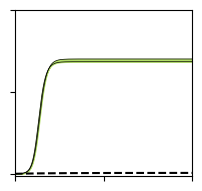

In [184]:
MINS_T, MAXS_T, BASES_T,OG_T = calc_minmax_trajectories(SIRT, P_min_T, P_max_T, taus["mean"][1], PARAMS, simulated_days = N_days)
fig_comparison_T = plot_double_comparison(days, MINS_T, MAXS_T, BASES_T, OG_T, "figures/Fig_2/I(pol,hom)_T.pdf", Lx, Ly, x_max = 800, y_max = 0.7)

avg_predicted = (MINS_T[0][-1] + MINS_T[1][-1] + MAXS_T[0][-1] + MAXS_T[1][-1]) / 2

avg_base = (BASES_T[0][-1] + BASES_T[1][-1]) / 1

perc_increase = ((avg_predicted - avg_base) / avg_base)

print(f"increase in infections for T model: x {perc_increase:.2f}")
print("base =", avg_base,"predicted =", avg_predicted)

Percentage increase in infections for V model: 223.94%
base = 0.043500267 predicted = 0.14091408


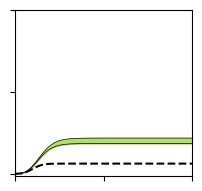

In [185]:
MINS_V, MAXS_V, BASES_V, OG_V = calc_minmax_trajectories(SIRV, P_min_V, P_max_V, xis["mean"][1], PARAMS, simulated_days = N_days)
fig_comparison_V = plot_double_comparison(days, MINS_V, MAXS_V, BASES_V, OG_V, "figures/Fig_2/I(pol,hom)_V.pdf", Lx, Ly, x_max = 800, y_max = 0.7)

avg_predicted = (MINS_V[0][-1] + MINS_V[1][-1] + MAXS_V[0][-1] + MAXS_V[1][-1]) / 2

avg_base = (BASES_V[0][-1] + BASES_V[1][-1])

perc_increase = ((avg_predicted - avg_base) / avg_base) * 100
print(f"Percentage increase in infections for V model: {perc_increase:.2f}%")

print("base =", avg_base,"predicted =", avg_predicted)

In [75]:
avg_predicted

Array(0.09557687, dtype=float32)

In [76]:
avg_base

Array(0.02244354, dtype=float32)